In [1]:
# GLM Case Study 1
# Tasl 1: Convert numeric variables to factors

persinj <- read.csv("persinj.csv")
summary(persinj)

      amt               inj           legrep          op_time     
 Min.   :     10   Min.   :1.00   Min.   :0.0000   Min.   : 0.10  
 1st Qu.:   6297   1st Qu.:1.00   1st Qu.:0.0000   1st Qu.:23.00  
 Median :  13854   Median :1.00   Median :1.0000   Median :45.90  
 Mean   :  38367   Mean   :1.83   Mean   :0.6366   Mean   :46.33  
 3rd Qu.:  35123   3rd Qu.:2.00   3rd Qu.:1.0000   3rd Qu.:69.30  
 Max.   :4485797   Max.   :9.00   Max.   :1.0000   Max.   :99.10  

In [2]:
# convert inj to a factor
persinj$inj <- as.factor(persinj$inj)
summary(persinj)

# now inj will display counts instead of numerical summary stats

      amt          inj           legrep          op_time     
 Min.   :     10   1:15638   Min.   :0.0000   Min.   : 0.10  
 1st Qu.:   6297   2: 3376   1st Qu.:0.0000   1st Qu.:23.00  
 Median :  13854   3: 1133   Median :1.0000   Median :45.90  
 Mean   :  38367   4:  189   Mean   :0.6366   Mean   :46.33  
 3rd Qu.:  35123   5:  188   3rd Qu.:1.0000   3rd Qu.:69.30  
 Max.   :4485797   6:  256   Max.   :1.0000   Max.   :99.10  
                   9: 1256                                   

In [4]:
# Task 2:
# a - split data intro training and test
# b - run OLS model for claim size or a transformation of claim size on training set
# c - calculate RMSE of the model on the test set. This provides benchmark for further model dev

library(caret)
set.seed(2019)

partition <- createDataPartition(y = persinj$amt, p = 0.75, list = FALSE)
data.train <- persinj[partition, ]
data.test <- persinj[-partition, ]
summary(data.train$amt)
summary(data.test$amt)

# these are skewed datasets, so the train and test might look quite different
# fortuantely the medians are very close
# note due to how skewed the data is, mean absolute error (MAE) may be more
# useful than RMSE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     20    6297   13852   38670   35118 4485797 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     10    6299   13858   37458   35140 1450818 

In [5]:
# our first candidate model is a linear mdel on the log of claim size
# using OLS, but via the glm() function

glm.ols <- glm(log(amt) ~ inj + legrep * op_time,
    family = gaussian(link = "identity"), data = data.train)

summary(glm.ols)



Call:
glm(formula = log(amt) ~ inj + legrep * op_time, family = gaussian(link = "identity"), 
    data = data.train)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.5212622  0.0269021 279.579  < 2e-16 ***
inj2            0.5912759  0.0237858  24.858  < 2e-16 ***
inj3            0.8161053  0.0385945  21.146  < 2e-16 ***
inj4            0.7958558  0.0901834   8.825  < 2e-16 ***
inj5            0.6462279  0.0894089   7.228 5.12e-13 ***
inj6            0.3823662  0.0777895   4.915 8.95e-07 ***
inj9           -0.8151999  0.0367039 -22.210  < 2e-16 ***
legrep          0.9120834  0.0339725  26.848  < 2e-16 ***
op_time         0.0358738  0.0005093  70.431  < 2e-16 ***
legrep:op_time -0.0101808  0.0006384 -15.946  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.146774)

    Null deviance: 35056  on 16527  degrees of freedom
Residual deviance: 18942  on 16518  degre

In [9]:
pred.ols <- exp(predict(glm.ols, newdata = data.test))
head(pred.ols)

# example - '3' refers to obs 3, which is the first obs in test set

RMSE(data.test$amt, pred.ols)

RMSE(data.test$amt, mean(data.train$amt))

# ols is an improvement in RMSE compared to null model

3        10        13        21        24        27 
1853.5345 1853.5345 4609.6856  820.2833  820.2833  820.2833

[1] 72888.33

[1] 79370.9

In [13]:
# Task 3:
# Evaluate potential combinations of distribution and link fnc
# a - explain why the choices are reasonable
# b - fit 3 models to the training set and calculate their test RMSE
# c - select the best combination, justify your choice

# proposed GLM 1: log link normal GLM on claim size
# now we take a linear model with amt size as target (not log amt)
# however we will use a log link
# so basically normal distribution with log link instead of identity

# this glm ensures positive prediction
# however it allows for possible negative target var obs

glm.log <- glm(amt ~ inj + legrep * op_time,
            family = gaussian(link = "log"), data = data.train)

summary(glm.log)

# by default predict() generates predictions on the scale of
# the linear predictor (log scale here) due to link
# to transform to the original scale use type = "response"

pred.log <- predict(glm.log, newdata = data.test, type = "response")
head(pred.log)
RMSE(data.test$amt, pred.log)

# note that RMSE decreases, so normal GLM with log link beats
# OLS with with log transform.



Call:
glm(formula = amt ~ inj + legrep * op_time, family = gaussian(link = "log"), 
    data = data.train)

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.559238   0.120163  71.230  < 2e-16 ***
inj2            0.572982   0.031018  18.473  < 2e-16 ***
inj3            0.825502   0.034683  23.801  < 2e-16 ***
inj4            0.883796   0.057430  15.389  < 2e-16 ***
inj5            1.531415   0.034374  44.552  < 2e-16 ***
inj6            1.506266   0.042987  35.040  < 2e-16 ***
inj9           -0.552178   0.146506  -3.769 0.000164 ***
legrep          0.068766   0.138410   0.497 0.619318    
op_time         0.027185   0.001508  18.029  < 2e-16 ***
legrep:op_time  0.003195   0.001721   1.857 0.063383 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6897153068)

    Null deviance: 1.4770e+14  on 16527  degrees of freedom
Residual deviance: 1.1393e+14  on 16518  degrees of fre

3       10       13       21       24       27 
5228.901 5228.901 5602.912 3010.251 3010.251 3010.251

[1] 69623.89

In [17]:
# GLM 2: log link gamma GLM
# justification for log link:
# ensures all predictions are positive (like the target variable)
# also makes coefficients easy to interpret - they are related to
# multiplicative changes to the linear predictor
# thus the log link is better than the canonical inverse link

glm.gamma <- glm(amt ~ inj + legrep * op_time,
            family = Gamma(link = "log"), data = data.train)

summary(glm.gamma)

RMSE(data.test$amt, predict(glm.gamma, newdata  = data.test, type = "response"))


Call:
glm(formula = amt ~ inj + legrep * op_time, family = Gamma(link = "log"), 
    data = data.train)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.2056640  0.0331403 247.604  < 2e-16 ***
inj2            0.5975174  0.0293014  20.392  < 2e-16 ***
inj3            0.8568408  0.0475440  18.022  < 2e-16 ***
inj4            1.1029945  0.1110956   9.928  < 2e-16 ***
inj5            1.5036755  0.1101415  13.652  < 2e-16 ***
inj6            0.9004443  0.0958278   9.396  < 2e-16 ***
inj9           -0.6321655  0.0452150 -13.981  < 2e-16 ***
legrep          0.4393948  0.0418502  10.499  < 2e-16 ***
op_time         0.0344292  0.0006275  54.871  < 2e-16 ***
legrep:op_time -0.0049104  0.0007865  -6.243 4.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 1.740277)

    Null deviance: 33141  on 16527  degrees of freedom
Residual deviance: 16705  on 16518  degrees of freedom
AI

[1] 68831.79

In [18]:
# GLM 3: Inverse Gaussian GLM
# alternative to gamma glm. Has a fatter right tail. canonical link is inverse square link
# this ensures positive predictions but not easy to predict
# thus log link is more commonly used

# glm.ig <- glm(amt ~ inj + legrep * op_time, data = data.train, family = inverse.gaussian(link = "log"))

# note that the model will fail to converge
# we will stick to the gamma glm for subsequent tasks

Warning message:
“step size truncated due to divergence”
Warning message:
“step size truncated due to divergence”


ERROR: Error: inner loop 1; cannot correct step size


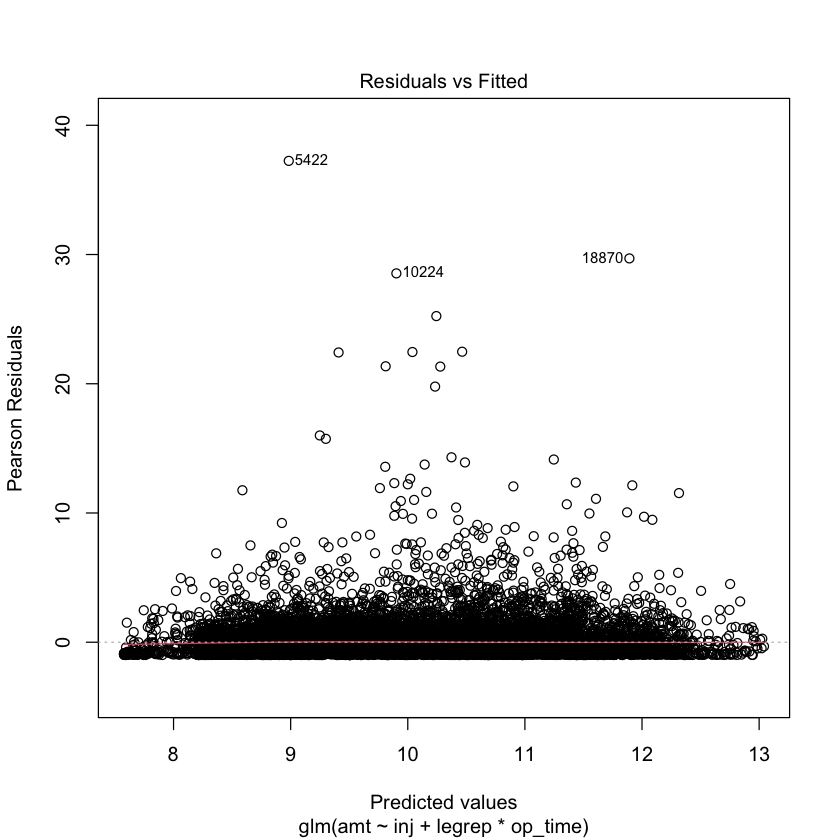

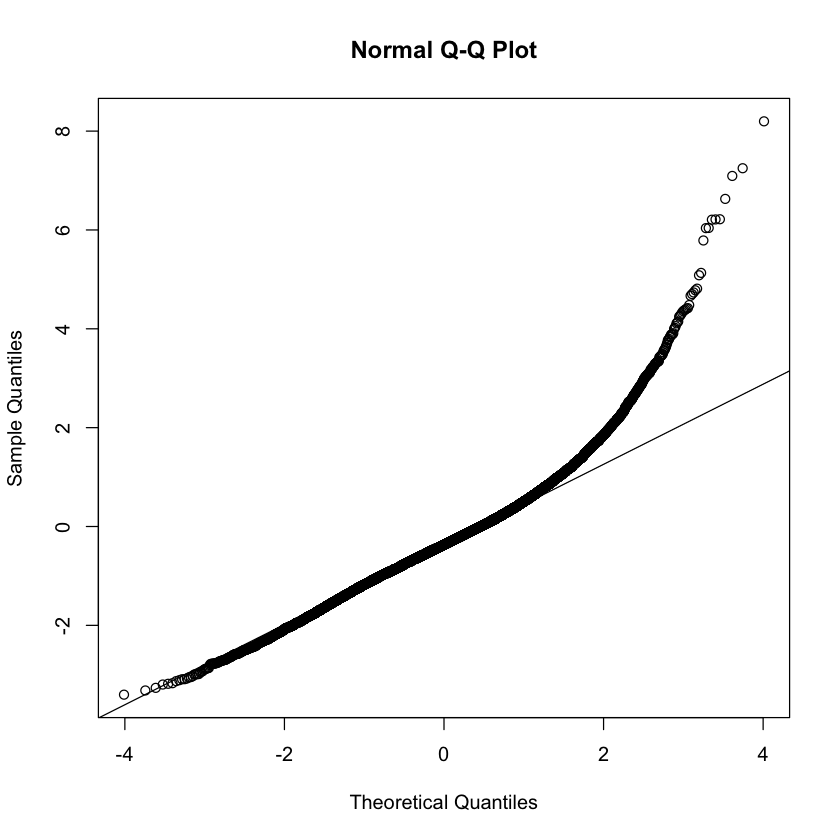

In [21]:
par(bg = "#ffffff")
# Task 4: Validate the model
# a - compare the recommended model from task 3 to OLS model from task 2
# b - provide and interpret the diagnostic plots for rec. model to check
# -- model assumptions

# Gamma GLM vs Benchmark OLS
# RMSE of gamma glm is lower than that of OLS model
# 68.6k vs 72.8k
# Summary of gamma glm shows that all coeff estimates are statistically sig.
# Retain all existing features in the model.

# Diagnostics
# residuals vs fitted plot
plot(glm.gamma, which = 1)

# QQ plot
qqnorm(residuals(glm.gamma))
qqline(residuals(glm.gamma))

# Residuals vs Fitted:
# residuals mostly scatter around 0.
# However spread of positive residuals tends to be much higher than the negative residuals
# a few unusually large positive obs.

# QQ plot allows us to assess normality of standardized deviance residuals (not raw resid)
# The model looks problematic on the right end with points deviating significantly upwards.
# There are a lot more large positiuve standardized deviance residuals than under a normal distr.
# the data and deviance residuals are more skewed than the gamma distribution
# a fatter-tailed model may perform better.

# Recall that standardized deviance residuals should be approx normal in glm

In [24]:
# Task 5: Interpret Model
# a - run summary and provide output
# b - interpret the coeff estimates in a way that will provide useful
# -- info to the insurance company or personal injury policyholder

glm.final <- glm(amt ~ inj + legrep * op_time,
    family = Gamma(link = "log"), data = persinj)
summary(glm.final)

# exponentiate coefficients to get multiplicative changes since we are using log link
exp(coef(glm.final))


Call:
glm(formula = amt ~ inj + legrep * op_time, family = Gamma(link = "log"), 
    data = persinj)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.2033907  0.0279443 293.562  < 2e-16 ***
inj2            0.6281073  0.0248995  25.226  < 2e-16 ***
inj3            0.8882054  0.0402472  22.069  < 2e-16 ***
inj4            1.1199670  0.0951566  11.770  < 2e-16 ***
inj5            1.3963478  0.0955128  14.619  < 2e-16 ***
inj6            0.8867918  0.0816012  10.867  < 2e-16 ***
inj9           -0.6205268  0.0381881 -16.249  < 2e-16 ***
legrep          0.4437842  0.0354423  12.521  < 2e-16 ***
op_time         0.0343052  0.0005303  64.685  < 2e-16 ***
legrep:op_time -0.0050443  0.0006663  -7.571 3.86e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 1.675808)

    Null deviance: 44010  on 22035  degrees of freedom
Residual deviance: 22242  on 22026  degrees of freedom
AIC: 

(Intercept)           inj2           inj3           inj4           inj5 
  3653.3167103      1.8740602      2.4307635      3.0647532      4.0404165 
          inj6           inj9         legrep        op_time legrep:op_time 
     2.4273297      0.5376611      1.5585941      1.0349004      0.9949684